In [1]:
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas_profiling import ProfileReport


Bad key "text.kerning_factor" on line 4 in
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
activities=['bending1','bending2','cycling','lying','sitting','standing','walking']
header=['Time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23','Activity']
path="AReM"
all_csv=[]
for activity in activities:
    fullpath=os.path.join(path,activity)
    for f in os.listdir(fullpath):
        paths=os.path.join(fullpath,f)
        df=pd.read_csv(paths,skiprows=5,error_bad_lines=False,header=None)
        df[7]=activity
        all_csv.append(df)
main_df=pd.DataFrame(pd.concat(all_csv,sort=False,axis = 0,ignore_index=True))
main_df.columns=header
main_df.to_csv("Activity.csv")

C:\Users\pc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 485: expected 7 fields, saw 8\n'
b'Skipping line 485: expected 7 fields, saw 8\n'


In [3]:
activity=pd.read_csv('Activity.csv')

In [4]:
activity.shape

(41757, 9)

In [5]:
activity=activity.drop_duplicates()

In [6]:
activity.shape

(41757, 9)

In [7]:
activity.head()

,Unnamed: 0,Time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,Activity
0,0,0,39.25,0.43,22.75,0.43,33.75,1.3,bending1
1,1,250,39.25,0.43,23.00,0.00,33.00,0.0,bending1
2,2,500,39.25,0.43,23.25,0.43,33.00,0.0,bending1
3,3,750,39.50,0.50,23.00,0.71,33.00,0.0,bending1
4,4,1000,39.50,0.50,24.00,0.00,33.00,0.0,bending1


In [8]:
activity.head()

,Unnamed: 0,Time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,Activity
0,0,0,39.25,0.43,22.75,0.43,33.75,1.3,bending1
1,1,250,39.25,0.43,23.00,0.00,33.00,0.0,bending1
2,2,500,39.25,0.43,23.25,0.43,33.00,0.0,bending1
3,3,750,39.50,0.50,23.00,0.71,33.00,0.0,bending1
4,4,1000,39.50,0.50,24.00,0.00,33.00,0.0,bending1


In [9]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41757 entries, 0 to 41756
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  41757 non-null  int64  
 1   Time        41757 non-null  int64  
 2   avg_rss12   41757 non-null  float64
 3   var_rss12   41757 non-null  float64
 4   avg_rss13   41757 non-null  float64
 5   var_rss13   41757 non-null  float64
 6   avg_rss23   41757 non-null  float64
 7   var_rss23   41757 non-null  float64
 8   Activity    41757 non-null  object 
dtypes: float64(6), int64(2), object(1)
memory usage: 3.2+ MB


In [10]:
activity.describe()

,Unnamed: 0,Time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
count,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000
mean,20878.000000,59873.242810,39.021258,1.472967,14.348149,1.513225,16.010977,1.631255
std,12054.351932,34639.378229,6.297586,2.055456,5.414405,1.644267,6.768380,1.642690
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10439.000000,30000.000000,35.250000,0.430000,11.500000,0.430000,12.000000,0.470000
50%,20878.000000,59750.000000,40.000000,0.500000,15.000000,0.830000,15.750000,1.000000
75%,31317.000000,89750.000000,44.000000,1.870000,18.000000,2.350000,19.250000,2.360000
max,41756.000000,119750.000000,56.250000,17.240000,35.000000,11.420000,40.330000,13.610000


In [11]:
dic={'bending1':0,
     'bending2':1,
     'cycling':2,
     'lying':3,
     'sitting':4,
     'standing':5,
     'walking':6}

In [12]:
X=activity.drop('Activity',axis=1)
y=activity['Activity']

In [13]:
y=y.map(dic)

In [14]:
X=X.drop(['Unnamed: 0','Time'],axis=1)

In [15]:
X.head()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,39.25,0.43,22.75,0.43,33.75,1.3
1,39.25,0.43,23.00,0.00,33.00,0.0
2,39.25,0.43,23.25,0.43,33.00,0.0
3,39.50,0.50,23.00,0.71,33.00,0.0
4,39.50,0.50,24.00,0.00,33.00,0.0


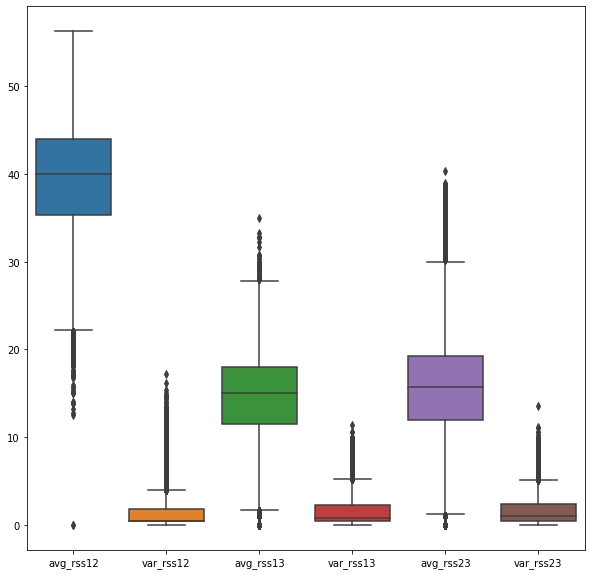

In [16]:
fig,ax= plt.subplots(figsize=(10,10))
sns.boxplot(data=X,ax=ax)

In [17]:
def IQR(col):
    Q1=X[col].quantile(0.25)
    Q3=X[col].quantile(0.75)
    IQR=Q3-Q1
    upperlimit=X[col].mean()+1.5 *IQR
    lowerlimit=X[col].mean()-1.5 *IQR
    X[col]=np.where(X[col]<lowerlimit,X[col].median(),X[col])
    X[col]=np.where(X[col]>upperlimit,X[col].median(),X[col])

    

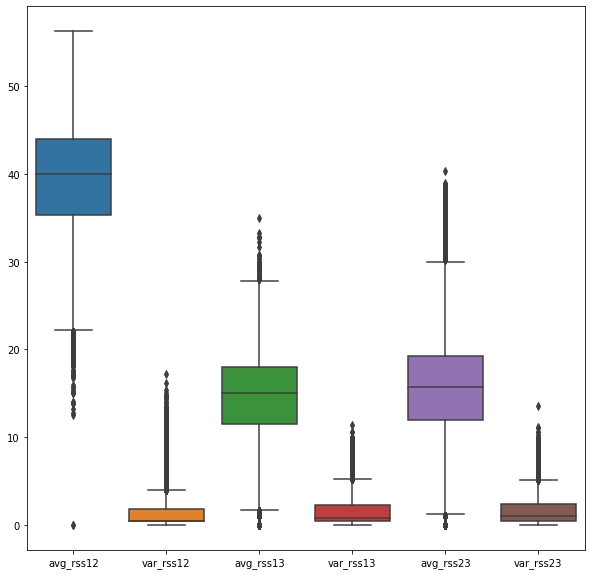

In [18]:
fig,ax= plt.subplots(figsize=(10,10))
sns.boxplot(data=X,ax=ax)

In [19]:
import numpy as np
features=["avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"]
for col in features:
    IQR(col)

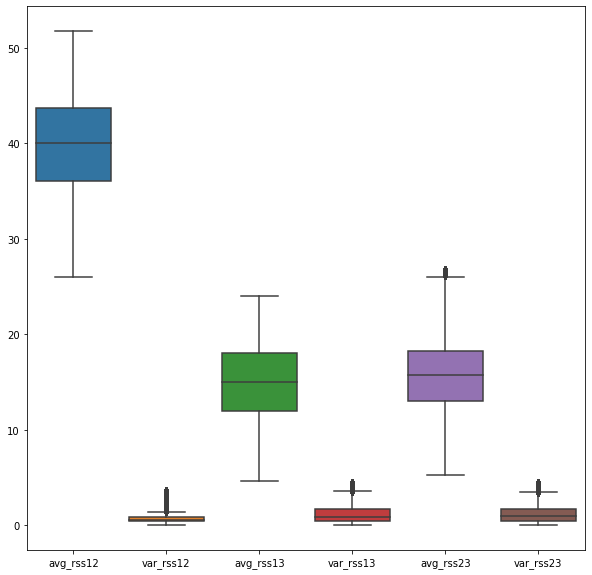

In [20]:
fig,ax= plt.subplots(figsize=(10,10))
sns.boxplot(data=X,ax=ax)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X=pd.DataFrame(X_scaled)

In [22]:

X=pd.DataFrame(X_scaled)

In [35]:
import os
import time
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

In [36]:
def train_test_model(model, X_train, X_test, y_train, y_test,labels):
    """ Train and test the model using the training and test data sets. Return the predictions, accuracy and metric reports. """
    print('Start training...', end='')
    model.fit(X_train, y_train)
    print('done!')
    print('Start testing...', end='')
    predictions = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    metrics_report = classification_report(y_test, predictions, target_names=labels)
    precision, recall, fscore, train_support = score(y_test, predictions, average='weighted')
    print('done!')
    return predictions, accuracy, metrics_report, (precision, recall, fscore)

In [37]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
print('Training set Shape: {}  | Test set Shape: {}'.format(X_train.shape, X_test.shape))

Training set Shape: (33405, 6)  | Test set Shape: (8352, 6)


In [38]:
labels=['bending1',
     'bending2',
     'cycling',
     'lying',
     'sitting',
     'standing',
     'walking']

Start training...done!
Start testing...done!
Total time: 2.41s
accuracy: 0.7590996168582376
              precision    recall  f1-score   support

    bending1       0.86      0.83      0.84       672
    bending2       0.84      0.70      0.77       480
     cycling       0.66      0.66      0.66      1440
       lying       0.91      0.97      0.94      1440
     sitting       0.71      0.70      0.70      1440
    standing       0.75      0.73      0.74      1440
     walking       0.69      0.72      0.71      1440

    accuracy                           0.76      8352
   macro avg       0.77      0.76      0.77      8352
weighted avg       0.76      0.76      0.76      8352



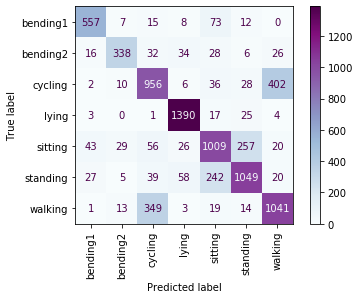

In [47]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=100, min_samples_split=10, n_jobs=-1, verbose=0)
st_time = time.time()
predictions, accuracy, metrics_report, rf_prf = train_test_model(rf_model, X_train, X_test, y_train, y_test, labels)
en_time = time.time()
print('Total time: {:.2f}s'.format(en_time-st_time))
print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)
plot_confusion_matrix(rf_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")
plt.show()

In [53]:
# loading library
import pickle

In [54]:
# create an iterator object with write permission and save SVM 
with open('ActivityRecognition', 'wb') as files:
    pickle.dump(rf_model, files)